# 12章 ループ整形

In [1]:
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np

#plt.rcParams['font.family'] ='sans-serif' #使用するフォント
plt.rcParams['font.family'] = 'Times New Roman' # font familyの設定
plt.rcParams['mathtext.fontset'] = 'cm' # math fontの設定
plt.rcParams['xtick.direction'] = 'in' #x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in' #y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0 #x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0 #y軸主目盛り線の線幅
plt.rcParams['font.size'] = 11 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 0.5 # 軸の線幅edge linewidth。囲みの太さ
plt.rcParams['mathtext.default'] = 'it'#'regular'
plt.rcParams['axes.xmargin'] = '0'
plt.rcParams['axes.ymargin'] = '0.05'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'

plt.rcParams["legend.fancybox"] = True     # 丸角
# plt.rcParams["legend.framealpha"] = 1    # 透明度の指定、0で塗りつぶしなし
# plt.rcParams["legend.edgecolor"] = 'gray' # edgeの色を変更
plt.rcParams["legend.handlelength"] = 1.8  # 凡例の線の長さを調節
plt.rcParams["legend.labelspacing"] = 0.4  # 垂直方向（縦）の距離の各凡例の距離
plt.rcParams["legend.handletextpad"] = 0.7 # 凡例の線と文字の距離の長さ
plt.rcParams["legend.markerscale"] = 1.0   # 点がある場合のmarker scale

In [2]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [3]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':', lw=0.5)
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [4]:
def bodeplot_set(fig_ax, *args):
    fig_ax[0].grid(which="both", ls=':', lw=0.5)
    fig_ax[0].set_ylabel('Gain [dB]')

    fig_ax[1].grid(which="both", ls=':', lw=0.5)
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

## PID制御

### PI制御

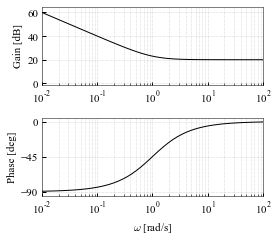

In [5]:
kp = 10
T1 = 1
K1 = tf([kp*T1, kp], [T1, 0])

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(K1, logspace(-2,2), plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=1)
ax[1].semilogx(w, phase*180/np.pi, color='k', lw=1)

bodeplot_set(ax)
ax[0].set_ylim(-1, 65)
ax[0].set_yticks([0, 20, 40, 60])
ax[1].set_ylim(-95, 5)
ax[1].set_yticks([0, -45, -90])

fig.tight_layout()
#fig.savefig("PI_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### PD制御

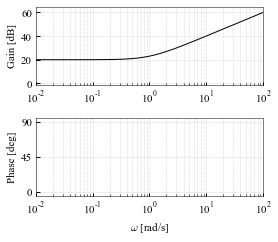

In [6]:
kp = 10
T2 = 1
K2 = tf([kp*T2, kp], [0, 1])

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(K2, logspace(-2,2), plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=1)
ax[1].semilogx(w, phase*180/np.pi, color='k', lw=1)

bodeplot_set(ax)
ax[0].set_ylim(-1, 65)
ax[0].set_yticks([0, 20, 40, 60])
ax[1].set_ylim(-5, 95)
ax[1].set_yticks([0, 45, 90])

fig.tight_layout()
#fig.savefig("PD_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 例12.1

In [7]:
a1 = 2;
a0 = 10;
b0 = 8;

P = tf( [0,b0], [1, a1, a0] )

print(P.pole())

[-1.+3.j -1.-3.j]


kP= 1
(GM, PM, wpc, wgc)
(inf, 65.7048110546354, nan, 3.6457513110645916)
-----------------
kP= 2
(GM, PM, wpc, wgc)
(inf, 36.67610510119843, nan, 4.77832575011283)
-----------------
kP= 5
(GM, PM, wpc, wgc)
(inf, 20.167955231621647, nan, 6.895465166801322)
-----------------


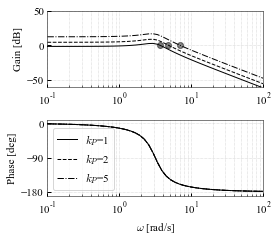

In [8]:
LS = linestyle_generator()
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

kp = (1, 2, 5)
for i in range(len(kp)):
    K = tf([0, kp[i]], [0, 1]) # P制御
    H = P * K  # 開ループ系
    gain, phase, w = bode(H, logspace(-1,2), plot=False)
    
    # ゲイン線図と位相線図
    pltargs = {'ls':next(LS), 'label':'$k_P$='+str(kp[i]), 'c':'k', 'lw':1}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)
    
    # ゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数
    gm, pm, Wpc, Wgc = margin(H)
    ax[0].scatter(Wgc,0, c='k', alpha=0.5)
    
    print('kP=', kp[i])
    print('(GM, PM, wpc, wgc)')
    print(margin(H))
    print('-----------------')
    
bodeplot_set(ax, 3)
    
ax[0].set_ylim(-60,50)
ax[0].set_yticks([-50,0,50])
ax[1].set_ylim(-190,10)
ax[1].set_yticks([-180,-90,0])

fig.tight_layout()
#fig.savefig("loop_pcont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

kP= 5 , kI= 0
(GM, PM, wpc, wgc)
(inf, 20.167955231621647, nan, 6.895465166801322)
-----------------
kP= 5 , kI= 5
(GM, PM, wpc, wgc)
(inf, 11.82769107947911, nan, 6.925816932331116)
-----------------
kP= 5 , kI= 10
(GM, PM, wpc, wgc)
(inf, 3.78117739690893, nan, 7.011454124020039)
-----------------


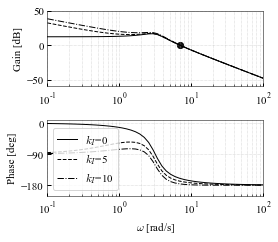

In [9]:
cmap = plt.get_cmap("tab10")

LS = linestyle_generator()
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

kp = 5
ki = (0, 5, 10)
for i in range(3):
    K = tf([kp, ki[i]], [1, 0])  # PI制御
    H = P * K  # 開ループ系
    gain, phase, w = bode(H, logspace(-1,2), plot=False)

    # ゲイン線図と位相線図
    pltargs = {'ls':next(LS), 'label':'$k_I$='+str(ki[i]), 'c':'k', 'lw':1}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)

    # ゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数
    gm, pm, Wpc, Wgc = margin(H)
    ax[0].scatter(Wgc,0, c='k', alpha=0.5)
    #if Wpc:
     #   ax[1].scatter(Wpc,-180, c='k')

    print('kP=', kp, ', kI=', ki[i])
    print('(GM, PM, wpc, wgc)')
    print(margin(H))
    print('-----------------')
    
bodeplot_set(ax, 3)

ax[0].set_ylim(-60,50)
ax[0].set_yticks([-50,0,50])
ax[1].set_ylim(-210,10)
ax[1].set_yticks([-180,-90,0])
fig.tight_layout()
#fig.savefig("loop_picont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

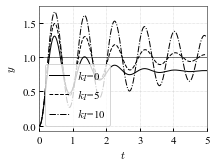

In [10]:
LS = linestyle_generator()
fig, ax = plt.subplots(figsize=(3, 2.3))

for i in range(3):
    K = tf([kp, ki[i]], [1, 0])  # PI制御
    Gyr = feedback(P*K, 1)  # 閉ループ系
    y, t = step(Gyr, np.arange(0, 5, 0.01))
    
    pltargs = {'ls':next(LS), 'label':'$k_I$='+str(ki[i]), 'c':'k', 'lw':1} 
    ax.plot(t, y, **pltargs)

ax.axhline(1, color="k", linewidth=0.5)
ax.set_xlim(0,5)
# ax.set_ylim(0,50)
plot_set(ax, '$t$', '$y$', 3)

#fig.savefig("loop_picont.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### 例12.2

kP= 5 , kD= 0
(GM, PM, wpc, wgc)
(inf, 20.167955231621647, nan, 6.895465166801322)
-----------------
kP= 5 , kD= 0.2
(GM, PM, wpc, wgc)
(inf, 35.375402123035826, nan, 7.007574615624287)
-----------------
kP= 5 , kD= 0.5
(GM, PM, wpc, wgc)
(inf, 54.89410025599193, nan, 7.609510738510982)
-----------------


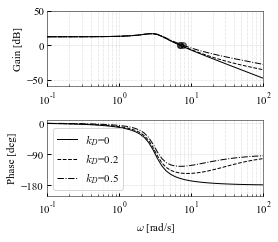

In [11]:
LS = linestyle_generator()
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

kp = 5
kd = (0, 0.2, 0.5)
for i in range(3):
    K = tf([kd[i], kp], [0,1])  # PD制御
    H = P * K  # 開ループ系
    gain, phase, w = bode(H, logspace(-1,2), plot=False)

    # ゲイン線図と位相線図
    pltargs = {'ls':next(LS), 'label':'$k_D$='+str(kd[i]), 'c':'k', 'lw':1}
    ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
    ax[1].semilogx(w, phase*180/np.pi, **pltargs)

    # ゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数
    gm, pm, wpc, wgc = margin(H)
    ax[0].scatter(wgc,0, alpha=0.5, c='k')
    #if wpc:
    #    ax[1].scatter(wpc,-180)

    print('kP=', kp, ',', 'kD=', kd[i])
    print('(GM, PM, wpc, wgc)')
    print(margin(H))
    print('-----------------')
    
bodeplot_set(ax, 3)

ax[0].set_ylim(-60,50)
ax[0].set_yticks([-50,0,50])
ax[1].set_ylim(-210,10)
ax[1].set_yticks([-180,-90,0])
ax[1].legend(loc=3)

fig.tight_layout()
#fig.savefig("loop_pdcont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

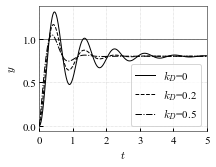

In [12]:
LS = linestyle_generator()
fig, ax = plt.subplots(figsize=(3, 2.3))

for i in range(3):
    K = tf([kd[i], kp], [0, 1])  # PD制御
    Gyr = feedback(P*K, 1)  # 閉ループ系
    y, t = step(Gyr, np.arange(0, 5, 0.01))
    
    pltargs = {'ls':next(LS), 'label':'$k_D$='+str(kd[i]), 'c':'k', 'lw':1} 
    ax.plot(t, y, **pltargs)

ax.axhline(1, color="k", linewidth=0.5)
ax.set_xlim(0,5)
# ax.set_ylim(0,50)
plot_set(ax, '$t$', '$y$', 'best')

#fig.savefig("loop_pdcont.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

### PID制御

kP= 5 , kI= 10 , kD= 0.5
(GM, PM, wpc, wgc)
(inf, 42.71914588330711, nan, 7.1572968579798095)
-----------------


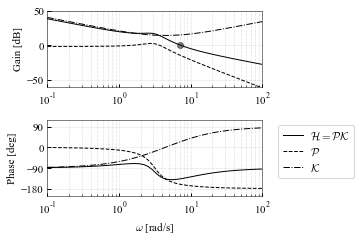

In [13]:
LS = linestyle_generator()
fig, ax = plt.subplots(2, 1, figsize=(5.2, 3.5)) 

kp = 5
ki = 10
kd = 0.5

K = tf([kd, kp, ki], [1,0])  # PID制御
H = P * K  # 開ループ系

gain, phase, w = bode(H, logspace(-1,2), plot=False)
pltargs = {'ls':next(LS), 'label':'$\mathcal{H}=\mathcal{PK}$', 'c':'k', 'lw':1}
ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
ax[1].semilogx(w, phase*180/np.pi, **pltargs)

gain, phase, w = bode(P, logspace(-1,2), plot=False)
pltargs = {'ls':next(LS), 'label':'$\mathcal{P}$', 'c':'k', 'lw':1}
ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
ax[1].semilogx(w, phase*180/np.pi, **pltargs)
    
gain, phase, w = bode(K, logspace(-1,2), plot=False)
pltargs = {'ls':next(LS), 'label':'$\mathcal{K}$', 'c':'k', 'lw':1}
ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
ax[1].semilogx(w, phase*180/np.pi, **pltargs)

# ゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数
gm, pm, wpc, wgc = margin(H)
ax[0].scatter(wgc,0, alpha=0.5, c='k')

print('kP=', kp, ', kI=', ki, ', kD=', kd)
print('(GM, PM, wpc, wgc)')
print(margin(H))
print('-----------------')
    
bodeplot_set(ax, 3)

ax[0].set_ylim(-60,50)
ax[0].set_yticks([-50,0,50])
ax[1].set_ylim(-210,120)
ax[1].set_yticks([-180,-90,0,90])
ax[1].legend(loc=2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)

fig.tight_layout()
#fig.savefig("loop_pidcont_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

## 位相遅れ・進み補償

### 位相遅れ

omegam= 3.162277660168379
phim= -54.903198772415415


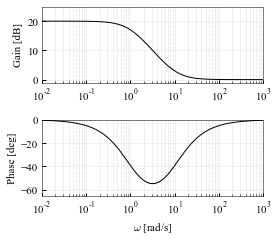

In [14]:
alpha = 10
T1 = 0.1
K1 = tf([alpha*T1, alpha], [alpha*T1, 1])

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(K1, logspace(-2,3), plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=1)
ax[1].semilogx(w, phase*180/np.pi, color='k', lw=1)

bodeplot_set(ax)
ax[0].set_ylim(-1, 25)
ax[1].set_ylim(-65, 0)
ax[1].set_yticks([0, -20, -40, -60])

omegam = 1/T1/np.sqrt(alpha)
phim = np.arcsin( (1-alpha)/(1+alpha) ) * 180/np.pi
print('omegam=', omegam)
print('phim=', phim)

fig.tight_layout()
#fig.savefig("lag_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

omegam= 0.03162277660168379
phim= -89.63763088074153


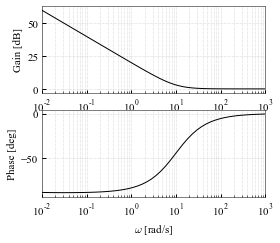

In [15]:
alpha = 100000
T1 = 0.1
K1 = tf([alpha*T1, alpha], [alpha*T1, 1])

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(K1, logspace(-2,3), plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=1)
ax[1].semilogx(w, phase*180/np.pi, color='k', lw=1)

bodeplot_set(ax)
omegam = 1/T1/np.sqrt(alpha)
phim = np.arcsin( (1-alpha)/(1+alpha) ) * 180/np.pi
print('omegam=', omegam)
print('phim=', phim)

### 位相進み

omegam= 3.162277660168379
phim= 54.9031987724154


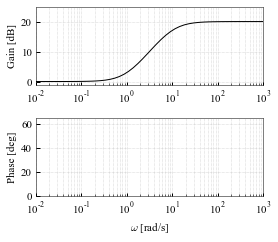

In [16]:
beta = 0.1
T2 = 1
K2 = tf([T2, 1],[beta*T2, 1])

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(K2, logspace(-2,3), plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=1)
ax[1].semilogx(w, phase*180/np.pi, color='k', lw=1)

bodeplot_set(ax)

omegam = 1/T2/np.sqrt(beta)
phim = np.arcsin( (1-beta)/(1+beta) ) * 180/np.pi
print('omegam=', omegam)
print('phim=', phim)

ax[0].set_ylim(-1, 25)
ax[1].set_ylim(0, 65)
ax[1].set_yticks([0, 20, 40, 60])

fig.tight_layout()
#fig.savefig("lead_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

omegam= 1000.0
phim= 89.88540847917132


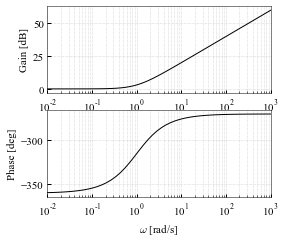

In [17]:
beta = 0.000001
T2 = 1
K2 = tf([T2, 1],[beta*T2, 1])

fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(K2, logspace(-2,3), plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain), color='k', lw=1)
ax[1].semilogx(w, phase*180/np.pi, color='k', lw=1)

bodeplot_set(ax)

omegam = 1/T2/np.sqrt(beta)
phim = np.arcsin( (1-beta)/(1+beta) ) * 180/np.pi
print('omegam=', omegam)
print('phim=', phim)

### 例12.3: 位相遅れ補償

In [21]:
P = tf(8,[1,2,0])

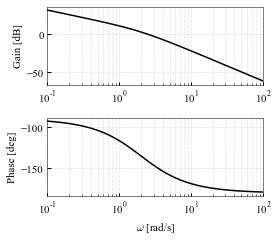

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(P, logspace(-1,2), plot=False)
    
ax[0].semilogx(w, 20*np.log10(gain), color='k')
ax[1].semilogx(w, phase*180/np.pi, color='k')

bodeplot_set(ax)

fig.tight_layout()
#fig.savefig("loop_leadlag_plant.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [23]:
print('(GM, PM, wpc, wgc)')
print(margin(P))
print('-----------------')

(GM, PM, wpc, wgc)
(inf, 38.66828249253447, nan, 2.499242135375306)
-----------------


In [24]:
np.sqrt(-2+2*np.sqrt(17))

2.4992421353753063

/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(
/Users/minami/opt/anaconda3/lib/python3.8/site-packages/control/timeresp.py:293: UserWarning: return_x specified for a transfer function system. Internal conversion to state space used; results may meaningless.
  warnings.warn(


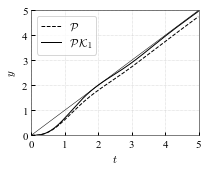

In [26]:
fig, ax = plt.subplots(figsize=(3, 2.3))
Gyr = feedback(P, 1)  # 閉ループ系
Td = np.arange(0, 5, 0.01)
Ud = Td
y, t, _ = lsim(Gyr, Td, Ud)
ax.plot(t, y, label='$\mathcal{P}$', lw=1, c='k', ls='--')

K = tf([20, 10], [20, 1])
Gyr = feedback(P*K, 1)  # 閉ループ系
y, t, _ = lsim(Gyr, Td, Ud)
ax.plot(t, y, label='$\mathcal{P}\,\mathcal{K}_1$', lw=1, c='k', ls='-')

ax.plot(t, Ud, color="k", linewidth=0.5)
ax.set_xlim(0,5)
ax.set_ylim(0,5)
plot_set(ax, '$t$', '$y$', 'best')

# fig.savefig("ex_loop_lag_lamp.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

(GM, PM, wpc, wgc)
(inf, 28.288172725122337, nan, 2.528833057669984)
-----------------


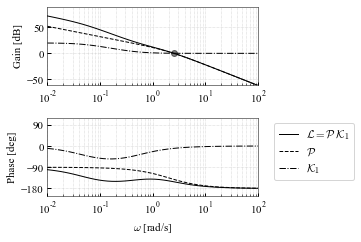

In [27]:
LS = linestyle_generator()
fig, ax = plt.subplots(2, 1, figsize=(5.2, 3.5)) 

H = P*K

gain, phase, w = bode(H, logspace(-2,2), plot=False)
pltargs = {'ls':next(LS), 'label':'$\mathcal{L}=\mathcal{P}\,\mathcal{K}_1$', 'c':'k', 'lw':1}
ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
ax[1].semilogx(w, phase*180/np.pi, **pltargs)

gain, phase, w = bode(P, logspace(-2,2), plot=False)
pltargs = {'ls':next(LS), 'label':'$\mathcal{P}$', 'c':'k', 'lw':1}
ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
ax[1].semilogx(w, phase*180/np.pi, **pltargs)
    
gain, phase, w = bode(K, logspace(-2,2), plot=False)
pltargs = {'ls':next(LS), 'label':'$\mathcal{K}_1$', 'c':'k', 'lw':1}
ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
ax[1].semilogx(w, phase*180/np.pi, **pltargs)

# ゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数
gm, pm, wpc, wgc = margin(H)
ax[0].scatter(wgc,0, alpha=0.5, c='k')

print('(GM, PM, wpc, wgc)')
print(margin(H))
print('-----------------')
    
bodeplot_set(ax, 3)

ax[0].set_ylim(-60,90)
ax[0].set_yticks([-50,0,50])
ax[1].set_ylim(-210,120)
ax[1].set_yticks([-180,-90,0,90])
ax[1].legend(loc=2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)

fig.tight_layout()
#fig.savefig("ex_loop_lag_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [28]:
K

TransferFunction(array([20, 10]), array([20,  1]))

### 例12.4: 位相進み補償

In [33]:
phim = 30*np.pi/180
beta = (1-np.sin(phim))/(1+np.sin(phim))
beta

0.3333333333333333

In [34]:
omegam = np.sqrt(-2+np.sqrt(4+64/beta))
omegam

3.4641016151377544

In [35]:
T2 = 1/omegam/np.sqrt(beta)
T2

0.5000000000000001

(GM, PM, wpc, wgc)
(inf, 60.0, nan, 3.464101615137757)
-----------------


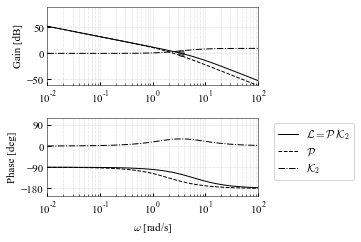

In [36]:
LS = linestyle_generator()
fig, ax = plt.subplots(2, 1, figsize=(5.2, 3.5)) 

K2 = tf([T2, 1],[beta*T2, 1])
H = P*K2

gain, phase, w = bode(H, logspace(-2,2), plot=False)
pltargs = {'ls':next(LS), 'label':'$\mathcal{L}=\mathcal{P}\,\mathcal{K}_2$', 'c':'k', 'lw':1}
ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
ax[1].semilogx(w, phase*180/np.pi, **pltargs)

gain, phase, w = bode(P, logspace(-2,2), plot=False)
pltargs = {'ls':next(LS), 'label':'$\mathcal{P}$', 'c':'k', 'lw':1}
ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
ax[1].semilogx(w, phase*180/np.pi, **pltargs)
    
gain, phase, w = bode(K2, logspace(-2,2), plot=False)
pltargs = {'ls':next(LS), 'label':'$\mathcal{K}_2$', 'c':'k', 'lw':1}
ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
ax[1].semilogx(w, phase*180/np.pi+360, **pltargs)

# ゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数
gm, pm, wpc, wgc = margin(H)
ax[0].scatter(wgc,0, alpha=0.5, c='k')

print('(GM, PM, wpc, wgc)')
print(margin(H))
print('-----------------')
    
bodeplot_set(ax, 3)

ax[0].set_ylim(-60,90)
ax[0].set_yticks([-50,0,50])
ax[1].set_ylim(-210,120)
ax[1].set_yticks([-180,-90,0,90])
ax[1].legend(loc=2)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc=2)

fig.tight_layout()
#fig.savefig("ex_loop_lead_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [37]:
K2

TransferFunction(array([0.5, 1. ]), array([0.16666667, 1.        ]))

In [38]:
T2

0.5000000000000001

In [39]:
margin(H)

(inf, 60.0, nan, 3.464101615137757)

## 章末問題

### 章末問題7

In [40]:
P = tf([0, 10], [1, 11, 10])  # 伝達関数の記述 10/(s+1)(s+10) = 10/(s^2 + 11s + 10)
P

TransferFunction(array([10]), array([ 1, 11, 10]))

制御対象のボード線図

-----------------
(GM, PM, wpc, wgc)
(inf, inf, nan, nan)
-----------------
2 states have been removed from the model

      10
---------------
s^2 + 11 s + 20

error= 0.5


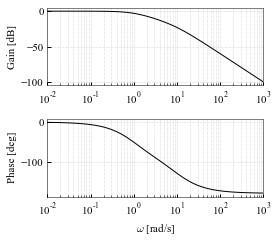

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(4, 3.5)) 

gain, phase, w = bode(P, logspace(-2,3), plot=False)  # 制御対象Pのボード線図の描画
    
ax[0].semilogx(w, 20*np.log10(gain), lw=1, c='k')
ax[1].semilogx(w, phase*180/np.pi, lw=1, c='k')

bodeplot_set(ax)
fig.tight_layout()

print('-----------------')
print('(GM, PM, wpc, wgc)')
print(margin(P))  # ゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数

print('-----------------')
Gyr = P/(1+P)
print(minreal(Gyr))
print('error=', 1-Gyr.dcgain())  # 定常偏差

低周波ゲインが０[dB] なので，このままフィードバック系を構築しても定常偏差(=0.5)が残る．

１．定常偏差を小さくするために，位相遅れ補償を設計する

低周波ゲインを上げるために，$\alpha=20$とする．そして，ゲインを上げる周波数は，$T_1$で決めるが，最終的なゲイン交差周波数（ゲイン交差周波数の設計値）の10分の1程度を$1/T_1$にするために，$T_1=0.5$とする（$1/T_1=20/10=2$）．

K1= 
10 s + 20
---------
10 s + 1

-----------------------
phase at 20rad/s = -155.99666022403284


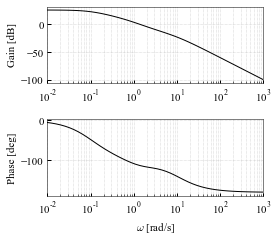

In [44]:
alpha = 20
T1 = 0.5
K1 = tf([alpha*T1, alpha], [alpha*T1, 1])  # 位相遅れ補償
print('K1=', K1)

fig, ax = plt.subplots(2, 1, figsize=(4,3.5)) 
H1 = P*K1
gain, phase, w = bode(H1, logspace(-2,3), plot=False)  # 開ループ系のボード線図
ax[0].semilogx(w, 20*np.log10(gain), lw=1, c='k')
ax[1].semilogx(w, phase*180/np.pi, lw=1, c='k')
bodeplot_set(ax)
fig.tight_layout()

[mag], [phase], omega = freqresp(H1, [20])  # 20[rad/s]におけるゲインと位相
phaseH1at20 = phase * (180/np.pi)
print('-----------------------')
print('phase at 20rad/s =', phaseH1at20)

最終的にゲイン補償によって，ゲイン交差周波数を設計値の20[rad/s]まで上げるが，あげてしまうと，位相余裕が60[dB]を下回る．実際，20[rad/s]における位相は -155[deg]なので，位相余裕は 25[deg]程度になってしまう．したがって，20[rad/s]での位相を -120[deg] まで進ませておく．

2. 位相進み補償の設計

20[rad/s]において位相を進ませる量は　60 - (180-155) = 35[deg]程度とする．

K2= 
0.09812 s + 1
-------------
0.02548 s + 1

-----------------------
gain at 20rad/s = -27.121982029204407
phase at 20rad/s = -119.99999999999999


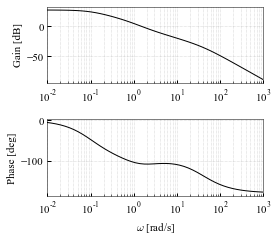

In [46]:
phim = (60- (180 + phaseH1at20 ) ) * np.pi/180
beta = (1-np.sin(phim))/(1+np.sin(phim))
T2 = 1/20/np.sqrt(beta)
K2 = tf([T2, 1],[beta*T2, 1])  # 位相進み補償
print('K2=', K2)

fig, ax = plt.subplots(2, 1, figsize=(4,3.5)) 
H2 = P*K1*K2
gain, phase, w = bode(H2, logspace(-2,3), plot=False)  #開ループ系のボード線図
ax[0].semilogx(w, 20*np.log10(gain), lw=1, c='k')
ax[1].semilogx(w, phase*180/np.pi, lw=1, c='k')
bodeplot_set(ax)
fig.tight_layout()

[mag], [phase], omega = freqresp(H2, [20])  # 20[rad/s]におけるゲインと位相
magH2at20 = mag
phaseH2at20 = phase * (180/np.pi)
print('-----------------------')
print('gain at 20rad/s =', 20*np.log10(magH2at20))
print('phase at 20rad/s =', phaseH2at20)

In [47]:
magH2at20

0.04404543449617801

位相進み補償により，20[rad/s]での位相が -120[deg]となっている．

あとは，ゲイン補償により，20[rad/s]のゲインを 0[dB] にすればよい．

3. ゲイン補償の設計

20[rad/s] におけるゲインが -27.12[dB] 程度なので， 27.12[dB]分上に移動させる．
そのために，$k = 1/magL2at20$ をゲイン補償とする．

k= 22.703828704125367
-----------------
(GM, PM, wpc, wgc)
(inf, 60.0, nan, 20.00000000000003)


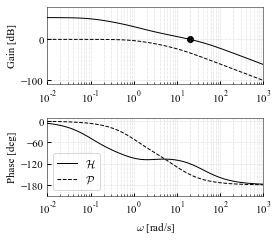

In [48]:
fig, ax = plt.subplots(2, 1, figsize=(4,3.5)) 

k = 1/magH2at20  # ゲイン補償
print('k=', k)

H = P*k*K1*K2
gain, phase, w = bode(H, logspace(-2,3), plot=False)  #開ループ系のボード線図
ax[0].semilogx(w, 20*np.log10(gain), label='$\mathcal{H}$', lw=1, c='k')
ax[1].semilogx(w, phase*180/np.pi, label='$\mathcal{H}$', lw=1, c='k')

gm, pm, wpc, wgc = margin(H) #開ループ系のゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数
ax[0].scatter(wgc,0, c='k')

gain, phase, w = bode(P, logspace(-2,3), plot=False)  #制御対象Pのボード線図
ax[0].semilogx(w, 20*np.log10(gain), ls='--', label='$\mathcal{P}$', lw=1, c='k')
ax[1].semilogx(w, phase*180/np.pi, ls='--', label='$\mathcal{P}$', lw=1, c='k')

gm, pm, wcp, wgc = margin(P) #制御対象Pのゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数
ax[0].scatter(wgc,0, c='k')

bodeplot_set(ax, 3)
ax[0].set_ylim(-110,80)
ax[1].set_ylim(-210,10)
ax[1].set_yticks([-180,-120,-60,0])
fig.tight_layout()

print('-----------------')
print('(GM, PM, wpc, wgc)')
print(margin(H))

fig.savefig("ex_loop_leadlag_bode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [49]:
1/0.044045

22.704052673402202

これにより，20[rad/s]がゲイン交差周波数になり，位相余裕もPM=60[deg]となる．

-----------------
開ループ伝達関数の安定性
[-39.24938213 -10.          -1.          -0.1       ]


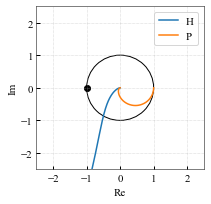

In [50]:
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(3,3))

x, y, _ = nyquist(H, logspace(-3,5,1000), plot=False) # 開ループ系のナイキスト線図
ax.plot(x, y, label='H')
x, y, _ = nyquist(P, logspace(-3,5,1000), plot=False) # 開ループ系のナイキスト線図
ax.plot(x, y, label='P')
# ax.plot(x, -y, ls='--')
ax.scatter(-1, 0, color='k')
plot_set(ax, 'Re', 'Im')
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)

c = patches.Circle(xy=(0, 0), radius=1, fill=False, ec='k')
ax.add_patch(c)

ax.legend()

print('-----------------')
print('開ループ伝達関数の安定性')
print(H.pole())

開ループ系は安定である．したがって，図とナイキストの安定判別より，フィードバック系は内部安定である．

位相進み遅れ補償

In [51]:
K = k * K1 * K2
K

TransferFunction(array([ 22.27778122, 271.59384947, 454.07657408]), array([ 0.25478108, 10.02547811,  1.        ]))

閉ループ系のステップ応答

error= 0.0021974323816077446
------------------
error= 0.5
------------------


(0.0, 1.5)

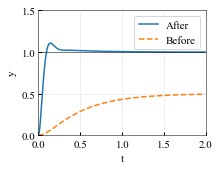

In [52]:
fig, ax = plt.subplots(figsize=(3,2.3))

ref = 1

Gyr_H = feedback(H, 1)  # フィードバック結合
y, t = step(Gyr_H, np.arange(0,2,0.01))  # ステップ応答

ax.plot(t,y*ref, label='After')

e_std = 1 - dcgain(Gyr_H)  # 直流ゲイン
print('error=', e_std)    
print('------------------')

Gyr_P = feedback(P, 1)
y, t = step(Gyr_P, np.arange(0,2,0.01))
pltargs = {'ls': '--', 'label': 'Before'}
ax.plot(t, y*ref, **pltargs)
    
e_std = 1 - dcgain(Gyr_P)
print('error=', e_std)    
print('------------------')

ax.axhline(ref, color="k", linewidth=0.5)  
plot_set(ax, 't', 'y', 'best')
ax.set_xlim(0,2)
ax.set_ylim(0,1.5)

# fig.savefig("loop_leadlag_step.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

In [53]:
1/455.1

0.002197319270490002

直流ゲイン = -0.01910765674282279
------------------
直流ゲイン = -6.020599913279624
------------------


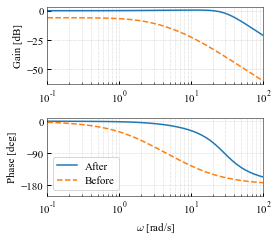

In [54]:
fig, ax = plt.subplots(2, 1, figsize=(4,3.5)) 

gain, phase, w = bode(Gyr_H, logspace(-1,2), plot=False)
ax[0].semilogx(w, 20*np.log10(gain), label='After')
ax[1].semilogx(w, phase*180/np.pi, label='After')

print('直流ゲイン =', 20*np.log10(Gyr_H.dcgain()))    
print('------------------')


gain, phase, w = bode(Gyr_P, logspace(-1,2), plot=False)
ax[0].semilogx(w, 20*np.log10(gain), **pltargs)
ax[1].semilogx(w, phase*180/np.pi, **pltargs)

print('直流ゲイン =', 20*np.log10(Gyr_P.dcgain()))    
print('------------------')
    
bodeplot_set(ax, 3)

ax[1].set_ylim(-210,10)
ax[1].set_yticks([-180,-90,0])

fig.tight_layout()
# fig.savefig("loop_leadlag_fbbode.pdf", transparent=True, bbox_inches="tight", pad_inches=0.0)

低周波ゲインが0[dB]に近くなり，また，バンド幅が大きくなっている

以下おまけ：ロールオフ特性

In [58]:
K3 = tf([10000], [1, 200, 10000])

In [59]:
Kroll = k*K1*K2*K3
Kroll

TransferFunction(array([ 222777.81215621, 2715938.49472496, 4540765.74082507]), array([2.54781081e-01, 6.09816943e+01, 4.55390643e+03, 1.00454781e+05,
       1.00000000e+04]))

-----------------
(GM, PM, wpc, wgc)
(2.9132215561172337, 38.65353985012163, 39.58702030222329, 19.400976996799614)


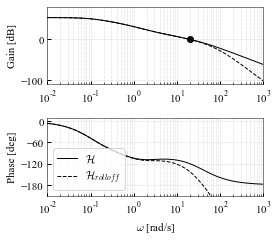

In [60]:
fig, ax = plt.subplots(2, 1, figsize=(4,3.5)) 

H = P*k*K1*K2

Hroll = P*Kroll
gain, phase, w = bode(H, logspace(-2,3), plot=False)  #開ループ系のボード線図
ax[0].semilogx(w, 20*np.log10(gain), label='$\mathcal{H}$', lw=1, c='k')
ax[1].semilogx(w, phase*180/np.pi, label='$\mathcal{H}$', lw=1, c='k')

gm, pm, wpc, wgc = margin(H) #開ループ系のゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数
ax[0].scatter(wgc,0, c='k')

gain, phase, w = bode(Hroll, logspace(-2,3), plot=False)  #制御対象Pのボード線図
ax[0].semilogx(w, 20*np.log10(gain), ls='--', label='$\mathcal{H}_{rolloff}$', lw=1, c='k')
ax[1].semilogx(w, phase*180/np.pi, ls='--', label='$\mathcal{H}_{rolloff}$', lw=1, c='k')

gm, pm, wcp, wgc = margin(P) #制御対象Pのゲイン余裕，位相余裕，位相交差周波数，ゲイン交差周波数
ax[0].scatter(wgc,0, c='k')

bodeplot_set(ax, 3)
ax[0].set_ylim(-110,80)
ax[1].set_ylim(-210,10)
ax[1].set_yticks([-180,-120,-60,0])
fig.tight_layout()

print('-----------------')
print('(GM, PM, wpc, wgc)')
print(margin(Hroll))